In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats
from scipy import stats

In [5]:
def Info(vy):
    T=len(vy);
    meany=np.mean(vy);
    mediany=np.median(vy);
    stddevy=np.std(vy);
    skewnessy=np.mean(np.power((vy-meany),3))/(np.power(stddevy,3)); #(T/((T-1)*(T-2)))*sum(((vy-meany)/stddevy)^3);
    kurtosisy=np.mean(np.power((vy-meany),4))/(np.power(stddevy,4));
  
    print("Average: ");
    print(meany)
    print("Median: ");
    print(mediany);
    print("Standard deviation ");
    print(stddevy);
    print("Skewness ");
    print(skewnessy);
    print("Kurtosis ");
    print(kurtosisy);
    print("percentiles (0.01,0.25,0.5,0.75,0.99)")
    print(np.quantile(vy,[0.01,0.25,0.5,0.75,0.99]))
    plt.plot(vy)
    plt.show()
    plt.hist(x=vy, bins=51, color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.xlabel('range of data')
    plt.ylabel('Frequency')
    plt.title('Histogram of data')
    plt.show()
    d=stats.gaussian_kde(vy)
    ind = np.linspace(0.8*np.min(vy),1.2*np.max(vy),10000)
    kdepdf = d.evaluate(ind)
    plt.figure(figsize=(10,5))
    # plot histgram of sample
    plt.plot(ind, stats.norm.pdf(ind, loc = np.mean(vy), scale = np.std(vy)), color="r", label='DGP normal')
    # plot estimated density
    plt.plot(ind, kdepdf, label='kde', color="g")
    plt.legend()
    plt.show()
    vy.plot.box()
    fig = sm.qqplot(vy, stats.t, fit=True,color='black')
    plt.show()

In [13]:
salary_experience=pd.read_csv('salary_experience.csv',sep=';')
salary=salary_experience['vy'] # dependent variable is salary
experience=salary_experience['vx'] # feature 1 is experience in number of years
education=salary_experience['vxz'] # feature 2 is education level taking 0 (lower level) and 1 (higher level)
salary_experience.tail()

,vy,vx,vxz
195,204500.3569,19.475199,1
196,234214.9763,23.644390,1
197,240752.4622,20.751504,1
198,256395.9085,24.216159,1
199,295684.9423,25.951089,1


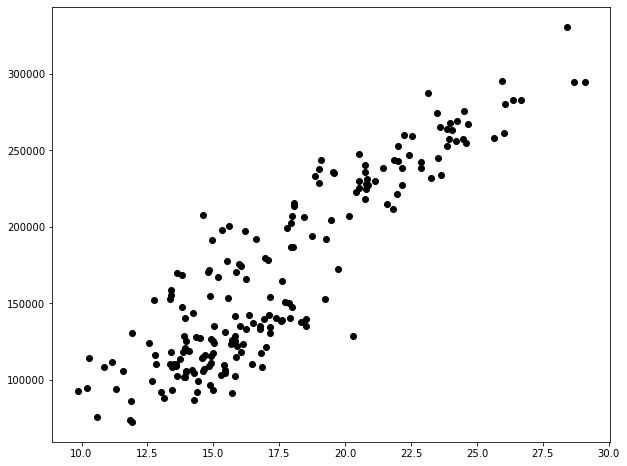

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(experience,salary,color="black")
plt.show()

Average: 
168420.42550024998
Median: 
148864.70965
Standard deviation 
61142.84567231137
Skewness 
0.486542550816175
Kurtosis 
1.98258754394819
percentiles (0.01,0.25,0.5,0.75,0.99)
[ 75607.0754302 115859.8941    148864.70965   227343.56545
 294923.426776 ]


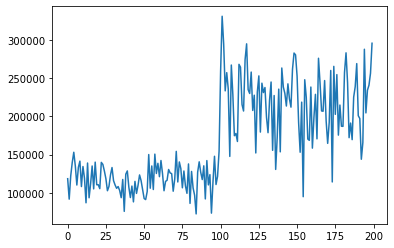

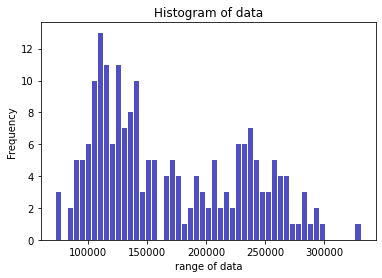

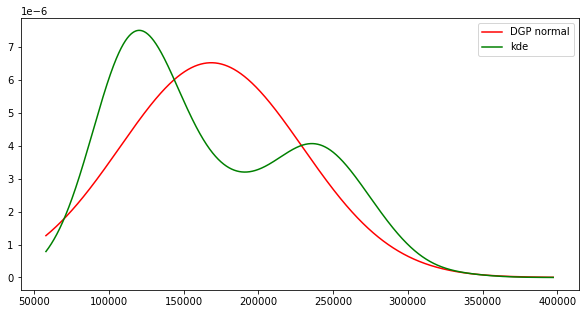

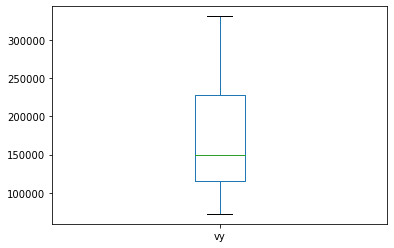

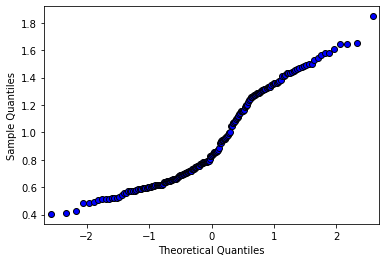

In [8]:
Info(salary) # sample density (green) is not normal as compared to red line (normal)
# It looks like a binormal distribution, but the regression does not have the normal data assumption, you can still work on it
# But a binormal means AVG will make no sense

In [9]:
#simple regression model
Y=salary
X=experience
X = sm.add_constant(X)
model1 = sm.OLS(Y,X).fit()
model1.summary() # Very good R square
# H_0: beta = 0, H_1 = beta != 0
# Asymptotic normality and CLT is the reason of comparing P and |t|

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     vy   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     821.5
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           2.18e-72
Time:                        13:48:39   Log-Likelihood:                -2324.1
No. Observations:                 200   AIC:                             4652.
Df Residuals:                     198   BIC:                             4659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.558e+04   8385.913     -7.821      0.000   -8.21e+04    -4.9e+04
vx          1.341e+04    467.984     28.662      0.000    1.25e+04    1.43e+04
==============================================================================
Omnibus:                        2.730   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.437
Skew:                           0.179   Prob(JB):                        0.296
Kurtosis:                       2.595   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Average: 
1.3533281162381173e-11
Median: 
-2972.852732241983
Standard deviation 
26945.466508009715
Skewness 
0.17903146361877537
Kurtosis 
2.5947211482499797
percentiles (0.01,0.25,0.5,0.75,0.99)
[-51868.58668116 -21120.02108962  -2972.85273224  18822.96722252
  57270.83510427]


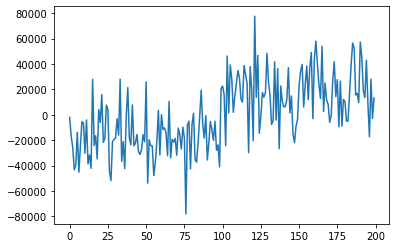

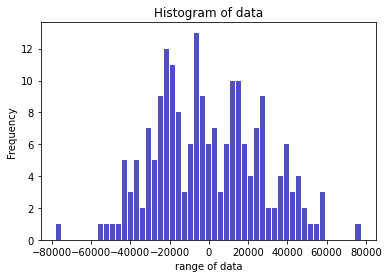

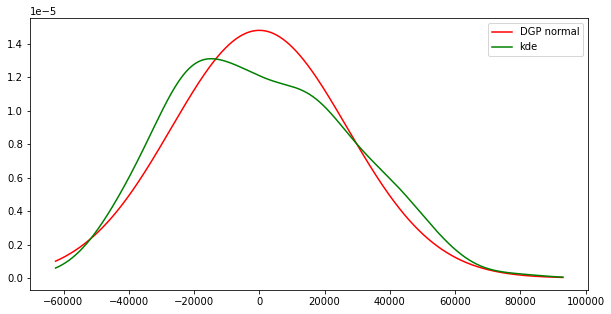

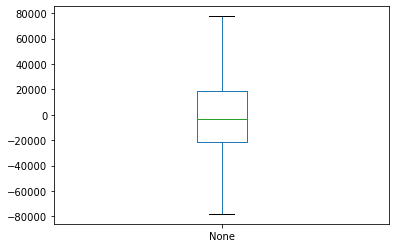

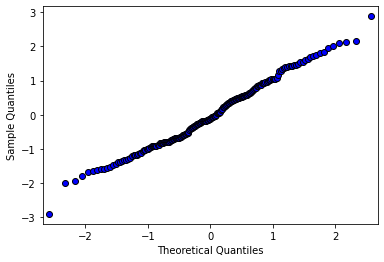

In [11]:
Info(model1.resid)
# Evaluate the model by analyzing the residuals: the average (expectation) is not indicative, because it is
# constructed by default being 0. However, the distribution may deviate a lot from a normal distribution.
# In this example, it does not deviate a lot, and the model could be just OK; however, this comparison to 
# normal distribution is only indicative, meaning that you cannot see how to improve the model

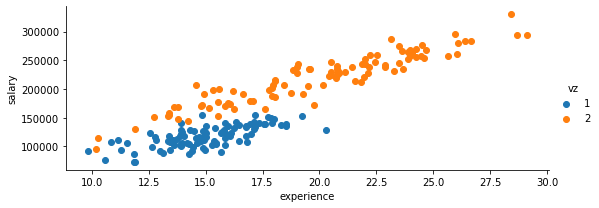

In [12]:
vz=education+1
import seaborn
from  matplotlib import pyplot

df = pd.DataFrame({
    'salary': salary,
    'experience': experience,
    'vz': vz
})
fg = seaborn.FacetGrid(data=df, hue='vz', aspect=2.61) # hue defines subsets of the data,
                                                       # which will be drawn on separate facets in the grid. 
fg.map(pyplot.scatter, 'experience', 'salary').add_legend()

# Here we violate the rule of cov(X_i|epsilon_i_hat) = 0: higher education tends to have higher salaries,
# given levels of experience
# The effect of exp is exaggerated, if you don't take into account the effect of edu

In [22]:
eduexp=education*experience

Y=salary
X=pd.concat([experience,education,eduexp],axis=1) # y_i= alpha_0 + alpha_1*EDU_i + beta_1*EXP_i + beta_2*EXP_i*EDU_i + epsilon_i
X = sm.add_constant(X)
model2 = sm.OLS(Y,X).fit()
model2.summary()
# OLS refers to the linearity of coefficients, not of variables: allow for interaction terms
# Try to avoid multicollenearity, though R square could be great

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     vy   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1127.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          2.72e-123
Time:                        11:07:09   Log-Likelihood:                -2197.6
No. Observations:                 200   AIC:                             4403.
Df Residuals:                     196   BIC:                             4416.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.94e+04   1.11e+04      1.747      0.082   -2503.791    4.13e+04
vx          6545.4010    734.865      8.907      0.000    5096.143    7994.659
vxz         3169.9532   1.31e+04      0.241      0.810   -2.28e+04    2.91e+04
0           3340.1784    812.139      4.113      0.000    1738.525    4941.832
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.195
Skew:                           0.044   Prob(JB):                        0.907
Kurtosis:                       3.125   Cond. No.                         355.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Average: 
1.1401425581425428e-10
Median: 
391.0488412975028
Standard deviation 
14312.481319821114
Skewness 
0.04448260059620243
Kurtosis 
3.1246772812687738
percentiles (0.01,0.25,0.5,0.75,0.99)
[-31072.44890444 -10030.4717536     391.0488413    9530.64872614
  36419.81873551]


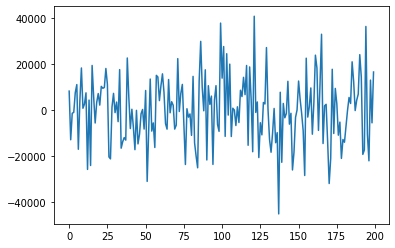

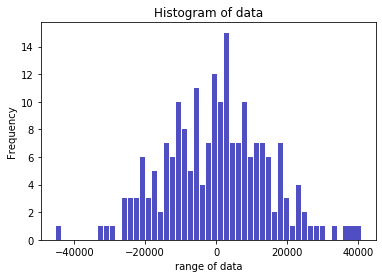

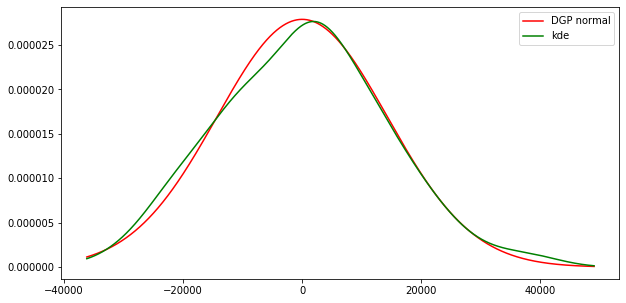

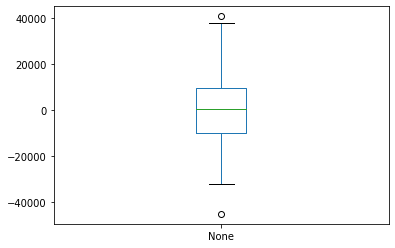

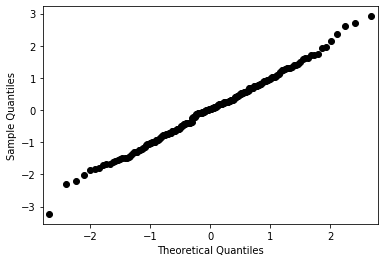

In [23]:
Info(model2.resid) # residuals are not expected to be systematically below/above 0

Note at last: when you have a categorical var containing many possible values with no hierarchy, you can't label them from 1 to n, because it has no meaning; instead you could try break it down into multiple categorical vars.